# Pandas repetition
    high-level library for data manipulation and analysis in Python. It provides efficient and easy-to-use data structures like DataFrame and Series that are designed to handle and process large datasets with ease. It is particularly useful for working with structured data (i.e., data that is organized in tables, spreadsheets, or databases).


## 0.Working with national test data

**a) Start with reading in the file riket2023_åk9_np.xlsx and the sheets for the different subjects.**

In [333]:
#läser in från excel i datamappen
import pandas as pd

# Define the file path to the Excel file containing the data.This is the file that will be processed later in the code.
national_test_file_path = "data/riket2023_åk9_np.xlsx"

# Read the Excel file to get a list of all sheet names in the file.
# `pd.ExcelFile()` creates an object that allows you to interact with the Excel file.
# `.sheet_names` extracts the names of all the sheets in the file as a list.
sheet_names = pd.ExcelFile(national_test_file_path).sheet_names

# Initialize an empty dictionary to store dataframes.
df_dict = {}

# Loop through all the sheet names in the variable `sheet_names` except the last one.
for sheet_name in sheet_names[:-1]:
    # For each sheet name, read the corresponding Excel sheet from the file.

    # `national_test_file_path` is the path to the Excel file.
    # `skiprows=8` tells pandas to skip the first 8 rows of the sheet (possibly to skip headers or metadata).
    # `sheet_name=sheet_name` specifies which sheet in the Excel file to read.
    df_dict[sheet_name] = pd.read_excel(
        national_test_file_path, skiprows=8, sheet_name=sheet_name
    )

# Get and display the keys (sheet names) in the dictionary `df_dict`. This confirms that the dataframes were successfully added to the dictionary.
df_dict.keys()


dict_keys(['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk'])

In [334]:
df_dict["Matematik"]

,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [335]:
# Create a list of all the keys (excel sheets) from the dictionary `df_dict`.
# `df_dict.keys()` returns a view of the dictionary's keys, which are the sheet names.
# `list()` converts this view into a standard Python list.
subjects = list(df_dict.keys())
subjects

['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']

### b) change name of columns

In [336]:
#visar alla columner i sheet Engelska 
df_dict["Engelska"].columns

Index(['Riket', 'Typ av huvudman', 'Totalt', 'Flickor', 'Pojkar', 'Totalt ',
       'Flickor ', 'Pojkar ', 'Totalt  ', 'Flickor  ', 'Pojkar  '],
      dtype='object')

In [337]:
import numpy as np

postfixes = [""]*2 + [" (A-F)"]*3 + [(" poäng")]*3 + [(" A-E")]*3
np.array(postfixes) # Convert the list into a NumPy array

#[""]*2: Creates a list with two empty strings: ["", ""].
#[" (A-F)"]*3: Creates a list with three elements, each being the string " (A-F)": [" (A-F)", " (A-F)", " (A-F)"].
# [" poäng"]*3: Creates a list with three elements, each being the string " poäng": [" poäng", " poäng", " poäng"].
# [" A-E"]*3: Creates a list with three elements, each being the string " A-E": [" A-E", " A-E", " A-E"].

array(['', '', ' (A-F)', ' (A-F)', ' (A-F)', ' poäng', ' poäng', ' poäng',
       ' A-E', ' A-E', ' A-E'], dtype='<U6')

In [338]:
#concatinera listorna postfixes och df_dict 
df_dict["Engelska"].columns.str.strip() + np.array(postfixes)

Index(['Riket', 'Typ av huvudman', 'Totalt (A-F)', 'Flickor (A-F)',
       'Pojkar (A-F)', 'Totalt poäng', 'Flickor poäng', 'Pojkar poäng',
       'Totalt A-E', 'Flickor A-E', 'Pojkar A-E'],
      dtype='object')

**NEW column names**

In [339]:
from copy import deepcopy #copy har fortfarande referenser kvar från minnesadressen. Deepcopy är en helt ny minnesadress

#behöver skapa en deep kopia av det förra dict eftersom de ändrade titlarna staplas varje gång programmet körs
df_dict_cleaned = deepcopy(df_dict)

for subject in subjects:
    new_columns = df_dict_cleaned[subject].columns.str.strip() + np.array(postfixes)
    
    df_dict_cleaned[subject].columns = new_columns
    df_dict_cleaned[subject] = df_dict_cleaned[subject].rename( # Rename the columns of the DataFrame for a specific subject
        {"Riket": "Plats", "Typ av huvudman": "Huvudman"}, axis=1 # Rename "Riket: " to "Nation"//axis=1 means columns, axis=0 means rows
        )

df_dict_cleaned["Matematik"]

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt poäng,Flickor poäng,Pojkar poäng,Totalt A-E,Flickor A-E,Pojkar A-E
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


### **c)** EDA (Exploratory Data Analysis)
Do some initial exploratory data analysis on this dataset. Use methods such as info, value_counts, columns, describe and some more to get a first insight into the dataset.

In [340]:
df_dict_cleaned["Matematik"].info()
#object is a datatype that can be any kind of data - its very flexible
# it can hold numbers, strings, lists, dictionaries, etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Plats          4 non-null      object 
 1   Huvudman       4 non-null      object 
 2   Totalt (A-F)   4 non-null      int64  
 3   Flickor (A-F)  4 non-null      int64  
 4   Pojkar (A-F)   4 non-null      int64  
 5   Totalt poäng   4 non-null      object 
 6   Flickor poäng  4 non-null      object 
 7   Pojkar poäng   4 non-null      object 
 8   Totalt A-E     4 non-null      float64
 9   Flickor A-E    4 non-null      float64
 10  Pojkar A-E     4 non-null      float64
dtypes: float64(3), int64(3), object(5)
memory usage: 484.0+ bytes


In [341]:
df_dict_cleaned["Matematik"]["Totalt (A-F)"]

0    106766
1     84163
2     22553
3        50
Name: Totalt (A-F), dtype: int64

**Kolla statestik med describe() & transpose()**

In [342]:
df_dict_cleaned["Matematik"].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Totalt (A-F),4.0,53383.000,50305.900509,50.0,16927.250,53358.00,89813.750,106766.0
Flickor (A-F),4.0,25774.000,24187.203159,25.0,8359.000,25761.50,43176.500,51548.0
Pojkar (A-F),4.0,27609.000,26119.924770,25.0,8568.250,27596.50,46637.250,55218.0
Totalt A-E,4.0,12.650,1.138713,11.6,11.825,12.45,13.275,14.1
Flickor A-E,4.0,12.400,0.920145,11.5,11.725,12.30,12.975,13.5
Pojkar A-E,4.0,12.875,1.357387,11.7,11.925,12.55,13.500,14.7


In [343]:
df_dict_cleaned["Matematik"].columns #visar namn på columner 
df_dict_cleaned["Matematik"][["Huvudman", "Totalt poäng"]] #går in i sheet matematik och visar columner _ och _


,Huvudman,Totalt poäng
0,Samtliga,89.1
1,Kommunal,88.1
2,Enskild,92.9
3,Skolverket,~100


### d) amount of students that got F in math

**DuckDB**

In [344]:
# Totalt (A-F) - All students in Huvudman
# Totalt (A-E) - All students that have passed

#Pick Huvudman Samtliga
df_math = df_dict_cleaned["Matematik"]
df_math

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt poäng,Flickor poäng,Pojkar poäng,Totalt A-E,Flickor A-E,Pojkar A-E
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [345]:
#SQL
import duckdb

total_students = duckdb.query(
    """
    SELECT "Totalt (A-F)"
    FROM df_math
    WHERE huvudman = 'Samtliga'
    """
).df().values[0][0]

total_students

np.int64(106766)

**PANDAS**

In [346]:
df_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Plats          4 non-null      object 
 1   Huvudman       4 non-null      object 
 2   Totalt (A-F)   4 non-null      int64  
 3   Flickor (A-F)  4 non-null      int64  
 4   Pojkar (A-F)   4 non-null      int64  
 5   Totalt poäng   4 non-null      object 
 6   Flickor poäng  4 non-null      object 
 7   Pojkar poäng   4 non-null      object 
 8   Totalt A-E     4 non-null      float64
 9   Flickor A-E    4 non-null      float64
 10  Pojkar A-E     4 non-null      float64
dtypes: float64(3), int64(3), object(5)
memory usage: 484.0+ bytes


### e) bar chart on total points for each subject

In [347]:
#matplotlib // barplotting // x = keys, height = points
total_points = {}  # Initializes an empty dictionary

df_dict_cleaned["Engelska"].query("Huvudman == 'Samtliga'")["Totalt poäng"][0] 
#df_dict_cleaned is a dictionary of DataFrames. "Engelska" is a key that retrieves the DataFrame related to "Engelska" 
#(.query("Huvudman == 'Samtliga'") = filters the DataFrame where the column Huvudman has the value 'Samtliga'.
# ["Totalt poäng"] selects the "Totalt poäng" column. [0] selects the first row's value in that column.

np.float64(97.0)

In [348]:
for subject in subjects:
    total_points[subject] = df_dict_cleaned[subject].query("Huvudman == 'Samtliga'")[
        "Totalt poäng"][0]

total_points

{'Engelska': np.float64(97.0),
 'Matematik': 89.1,
 'Svenska': np.float64(96.1),
 'Svenska som andraspråk': 77.7}

['Engelska', 'Matematik', 'Svenska', 'SvA']


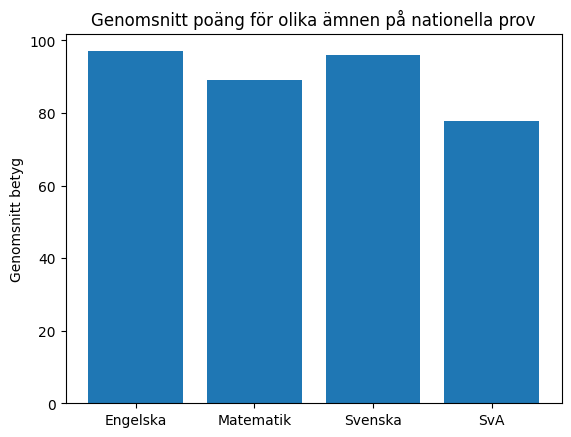

In [349]:
import matplotlib.pyplot as plt  # Import Matplotlib to create graphs

fig, ax = plt.subplots(1)
# Creates a figure (fig) and one subplot (ax) the actual graph.

ax.bar(
    x=total_points.keys(),  # X-axis: Subject names (from dictionary keys)
    height=total_points.values(),
)  # Y-axis: Average scores (from dictionary values)

ax.set(
    ylabel="Genomsnitt betyg",
    title="Genomsnitt poäng för olika ämnen på nationella prov",
)

subjects[-1] = (
    "SvA"  # Updates the last item in the subjects list to "SvA" ('Svenska som andraspråk')
)
print(subjects)

ax.set_xticks(labels=subjects, ticks=range(len(subjects)))

# 1. Working with grades data

**a) Draw a line chart for proportion of students that are missing approved grade for one or more subjects for the years 18-23.**

Step 1: Load the Data (Since the data is in Excel, we will use pandas to read it.)

In [350]:
import pandas as pd

# Load the Excel file
file_path = "data/betyg_o_prov_riksnivå.xlsx"  # Update with actual path
df = pd.read_excel(file_path, sheet_name="Tabell 1B")  # Adjust sheet_name if needed

# Display the first few rows
df.head(8)

#.skiprows=2 SKIPS FIRST 2ROWS


,Grundskolan – Betyg och Prov – Riksnivå,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tabell 1B: Resultat av slutbetyg för elever so...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Läsår\nHuvudman\nBakgrund,Elever som avslutat åk 9 som fått eller skulle...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Genomsnittligt meritvärde beräknat på 16 ämnen,NaN,NaN,Genomsnittligt meritvärde beräknat på 17 ämnen3,NaN,NaN,Andel (%) elever som saknar godkänt betyg i et...,NaN,NaN
6,NaN,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
7,2018/19,221.7,234.3,209.8,229.8,243.3,217,24.5,21.7,27.2


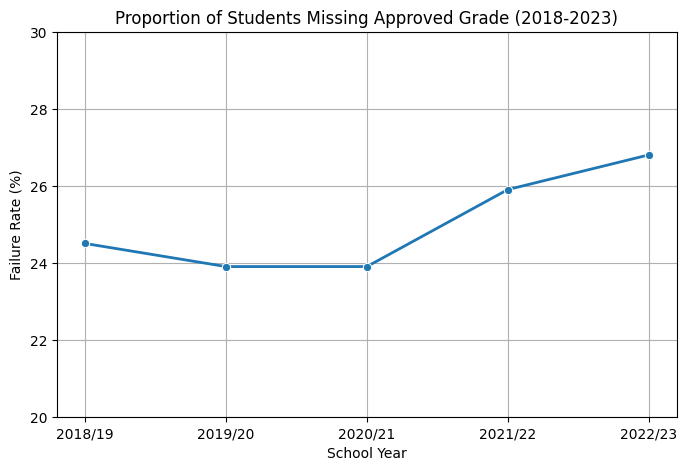

In [351]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for the specific years and failure percentages
years = ["2018/19", "2019/20", "2020/21", "2021/22", "2022/23"]
failure_rates = [24.5, 23.9, 23.9, 25.9, 26.8]  # Extracted from the table

# Convert to DataFrame for easy plotting
df_failures = pd.DataFrame({"Year": years, "Failure Rate (%)": failure_rates})

# Plot the line chart
plt.figure(figsize=(8,5))
sns.lineplot(data=df_failures, x="Year", y="Failure Rate (%)", marker="o", linewidth=2)
plt.title("Proportion of Students Missing Approved Grade (2018-2023)")
plt.ylabel("Failure Rate (%)")
plt.xlabel("School Year")
plt.ylim(20, 30)
plt.grid(True)
plt.show()


### **2. Olympic games data**

**a) Start with reading in the dataset into a dataframe using pandas.**

In [352]:
import pandas as pd

athlete_path = "data/athlete_events.csv"
df = pd.read_csv(athlete_path)

df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


**b) Now here is the code for using duckdb on pandas and it will return a df**

In [353]:
import duckdb 
result_df = duckdb.query("SELECT * FROM df").df()

result_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


**c) Using pandas columns method to find out the columns**

In [354]:
# Get the column names of the dataframe
columns = df.columns
print(columns)


Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')


**d) Finding the 10 oldest athletes, their age, and the sport**

In [355]:
print(result_df['Sport'].head(2).to_string(index=False)) #.to_string(index=False)) /// ensures the index isn't displayed as well. 
print(result_df['Sport'].tail(2).to_string(index=False)) #tail shows the bottom



Basketball
      Judo
Bobsleigh
Bobsleigh


In [356]:
# Sort the dataframe by 'Age' to get the oldest athletes (from oldest to youngest)
oldest_athletes = df[['Name', 'Age', 'Sport']].sort_values(by='Age', ascending=False).head()
#
# /////df['Age'] = current_year - df['Age']  # Calculate age based on birth year

print(oldest_athletes)


                              Name   Age             Sport
257054      John Quincy Adams Ward  97.0  Art Competitions
98118                Winslow Homer  96.0  Art Competitions
60861   Thomas Cowperthwait Eakins  88.0  Art Competitions
60862   Thomas Cowperthwait Eakins  88.0  Art Competitions
60863   Thomas Cowperthwait Eakins  88.0  Art Competitions


**e) Finding the 10 youngest athletes, their age, and the sport**

In [357]:
youngest_athletes = df[['Name', 'Age', 'Sport']].sort_values(by='Age', ascending=True).head()
print(youngest_athletes)

                                   Name   Age           Sport
142882               Dimitrios Loundras  10.0      Gymnastics
252230                     Liana Vicens  11.0        Swimming
101378                   Beatrice Hutiu  11.0  Figure Skating
73461   Carlos Bienvenido Front Barrera  11.0          Rowing
252233                     Liana Vicens  11.0        Swimming


**e) Find out the five sports with the highest median age**

In [358]:
# Group by Sport and calculate the median age for each sport
median_age_sports = result_df.groupby('Sport')['Age'].median()

# Sort by median age in descending order and get the top 5
top_5_highest_median_age = median_age_sports.sort_values(ascending=False).head(5)
print(top_5_highest_median_age)


Sport
Roque               59.0
Art Competitions    45.0
Alpinism            38.0
Polo                35.0
Croquet             33.0
Name: Age, dtype: float64


**f) Find out the five sports with the lowest median age**

In [359]:
# Sort by median age in ascending order and get the bottom 5
top_5_lowest_median_age = median_age_sports.sort_values(ascending=True).head(5)
print(top_5_lowest_median_age)


Sport
Rhythmic Gymnastics    18.0
Swimming               20.0
Diving                 22.0
Gymnastics             22.0
Figure Skating         22.0
Name: Age, dtype: float64


**g) Find out the top 5 countries after number of gold medals**

In [360]:
result_df["Team"].head(3)

0      China
1      China
2    Denmark
Name: Team, dtype: object

In [361]:
# Filter the rows where Medals is 'Gold' and group by Team = country
gold_medals_by_country = result_df[result_df['Medal'] == 'Gold'].groupby('Team').size()

# Sort by gold medals in descending order and get the top 10
top_10_gold_medals = gold_medals_by_country.sort_values(ascending=False).head(5)
print(top_10_gold_medals)


Team
United States    2474
Soviet Union     1058
Germany           679
Italy             535
Great Britain     519
dtype: int64


**g) Find out the top 5 countries after number of medals**

In [362]:
# Count all medals per country
medals_by_country = result_df.groupby('Team').size()

# Sort by total medals in descending order and get the top 10
top_10_medals_by_country = medals_by_country.sort_values(ascending=False).head(5)
print(top_10_medals_by_country)


Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
dtype: int64


**h) Plot a time series line chart of the number of female and male athletes in the same graph**

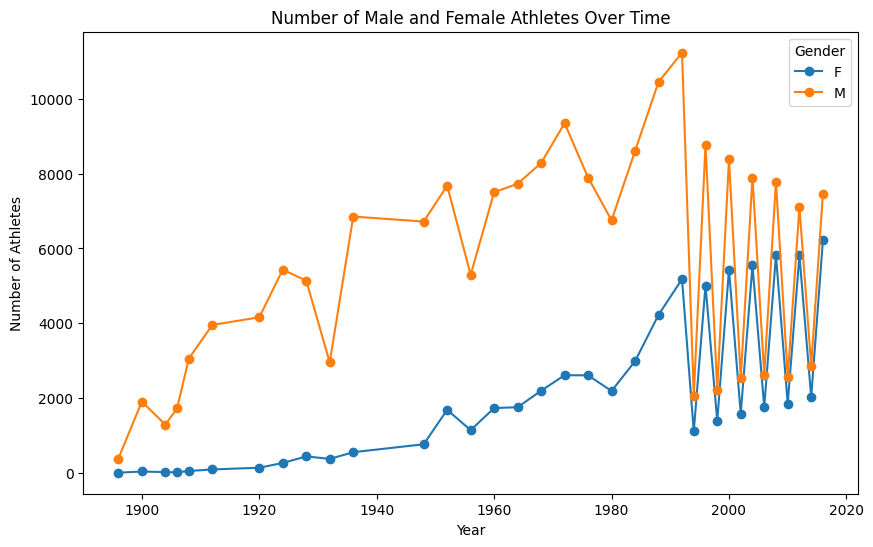

In [373]:
import matplotlib.pyplot as plt

# Group by Year and Gender, then count the number of athletes
gender_counts = result_df.groupby(['Year', 'Sex']).size().unstack(fill_value=0)

# Filter the data to include only the years between 1960 and 2024
gender_counts_filtered = gender_counts[(gender_counts.index >= 1960) & (gender_counts.index <= 2024)]

# Plot the data
gender_counts.plot(kind='line', marker='o', figsize=(10, 6))

# Add labels and title
plt.title('Number of Male and Female Athletes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend(title='Gender')

# Show the plot
plt.show()
